# **Part 1: Exploring the friendship paradox**

### 1.1 THE FRIENDSHIP PARADOX IN BA NETWORK ###

The friendship paradox states that, on average, one's friends will have more friends than the individual themselves. Friendship paradox using BA or the Barabási-Albert model can be explored by calculating the average degree of nodes and the average degree of neighbor nodes. 

**Pick a node *i* at random (e.g. use random.choice). Find its degree**

In [29]:
import networkx as nx
import random
import matplotlib.pyplot as plt

#set up the parameters for the Barabási-Albert (BA) model
n = 1000  # Total number of nodes
m = 2     # Number of edges to attach from a new node to existing nodes

#create a Barabási-Albert network using NetworkX
BA_network = nx.barabasi_albert_graph(n, m)

#function to randomly select a node and calculate its degree
def get_node_degree(G):
    random_node = random.choice(list(G.nodes))  # Pick a random node
    node_degree = G.degree(random_node)  # Get the degree of the random node
    return random_node, node_degree

**Now calculate the average degree of the neighbors**

In [31]:
def get_avg_neighbor_degree(G, node):
    neighbors = list(G.neighbors(node))  # Find the neighbors of the node
    if neighbors:  # Check if the node has neighbors
        avg_neighbor_degree = sum(G.degree(neighbor) for neighbor in neighbors) / len(neighbors)
    else:
        avg_neighbor_degree = 0  # If no neighbors, set to 0
    return avg_neighbor_degree

**Compare the two numbers to check if it's true that *i*'s friends (on average) have more friends than *i***

In [33]:
paradox_count = 0
iterations = 1000
node_stats = []  # List to keep track of stats for each iteration

for _ in range(iterations):
    node, node_degree = get_node_degree(BA_network)  # Get node and its degree
    avg_neighbor_degree = get_avg_neighbor_degree(BA_network, node)  # Get avg degree of neighbors
    
    # Check if the friendship paradox holds
    paradox_holds = avg_neighbor_degree > node_degree
    
    if paradox_holds:  # Increment the count if the paradox holds
        paradox_count += 1
    
    # Save the stats from this iteration
    node_stats.append((node, node_degree, avg_neighbor_degree, paradox_holds))

**Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?**

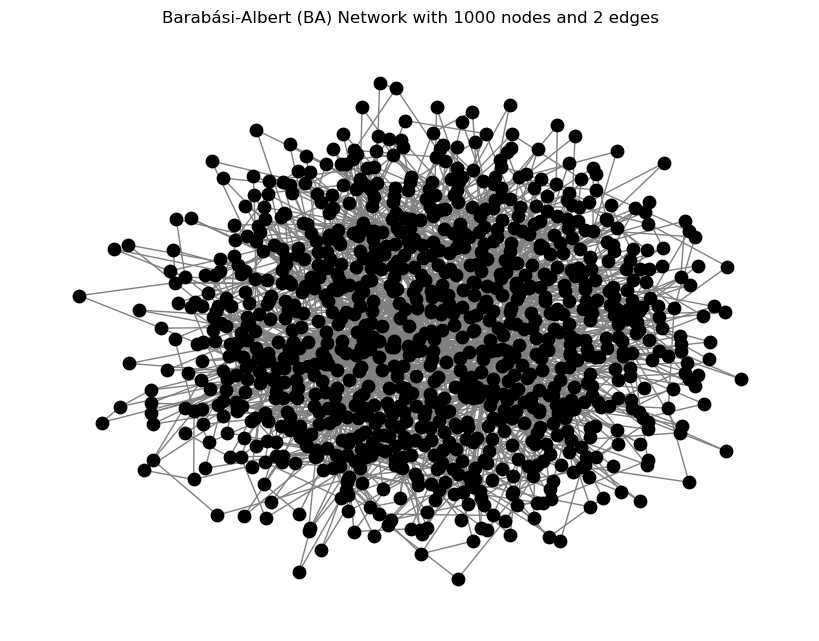


The friendship paradox holds 870 out of 1000 times (87.00%).

Stats for the random nodes and 10 iterations:
Iter |   Node |  Node Degree |   Avg Neighbor Deg |  Paradox Holds
--------------------------------------------------------------------
   1 |    763 |            2 |              15.00 |            Yes
   2 |    235 |            2 |              11.00 |            Yes
   3 |    440 |            8 |               3.25 |             No
   4 |    101 |            2 |              24.50 |            Yes
   5 |    839 |            2 |               5.00 |            Yes
   6 |    546 |            2 |               7.00 |            Yes
   7 |    535 |            6 |              21.50 |            Yes
   8 |    156 |            2 |              24.50 |            Yes
   9 |    322 |            2 |               7.50 |            Yes
  10 |    660 |            2 |               5.00 |            Yes


In [35]:
plt.figure(figsize=(8, 6))
nx.draw(BA_network, with_labels=False, node_color='black', node_size=80, edge_color='gray')
plt.title(f"Barabási-Albert (BA) Network with {n} nodes and {m} edges")
plt.show()

# Print how many times the paradox was true out of 1000
print(f"\nThe friendship paradox holds {paradox_count} out of {iterations} times ({paradox_count / iterations:.2%}).")

# Show the stats for the random nodes and 10 iterations
print("\033[1m\nStats for the random nodes and 10 iterations:\033[0m")
print(f"{'Iter':>4} | {'Node':>6} | {'Node Degree':>12} | {'Avg Neighbor Deg':>18} | {'Paradox Holds':>14}")
print("-" * 68)

# Loop through the first 10 iterations and print out the node info
for i, (node, node_degree, avg_neighbor_degree, paradox_holds) in enumerate(node_stats[:10], 1):
    print(f"{i:>4} | {node:>6} | {node_degree:>12} | {avg_neighbor_degree:>18.2f} | {'Yes' if paradox_holds else 'No':>14}")

### 1.2 THE FRIENDSHIP PARADOX MORE GENERALLY ###


**What if the power law is flatter, e.g. p(k)∼k^−γ with γ=2?  Will the fraction of times the paradox is true be higher or lower?** 

A flatter power law, such as p(k) ∼ k^(-γ) with γ = 2, typically leads to a lower fraction of times the friendship paradox holds true. This is because a flatter distribution has fewer high-degree nodes (hubs), which decreases the average degree of neighbors relative to the degree of an individual node. Consequently, the disparity required for the paradox to manifest diminishes.


**First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?**

When the power law is flatter (e.g., 𝛾 = 2), there are fewer high-degree nodes (hubs) compared to a steeper distribution. This results in a more uniform distribution of node degrees. Consequently, the average degree of a node’s neighbors is less likely to exceed its own degree, leading to a lower probability of the friendship paradox holding true. Thus, the paradox is expected to be less frequent with a flatter power law.

**Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the configuation model. The networkx funtion is here nx.configuration_model. I suggest you make the network pretty big ... let's say 5000 nodes or more.**

The friendship paradox holds 985 out of 1000 times (98.50%).


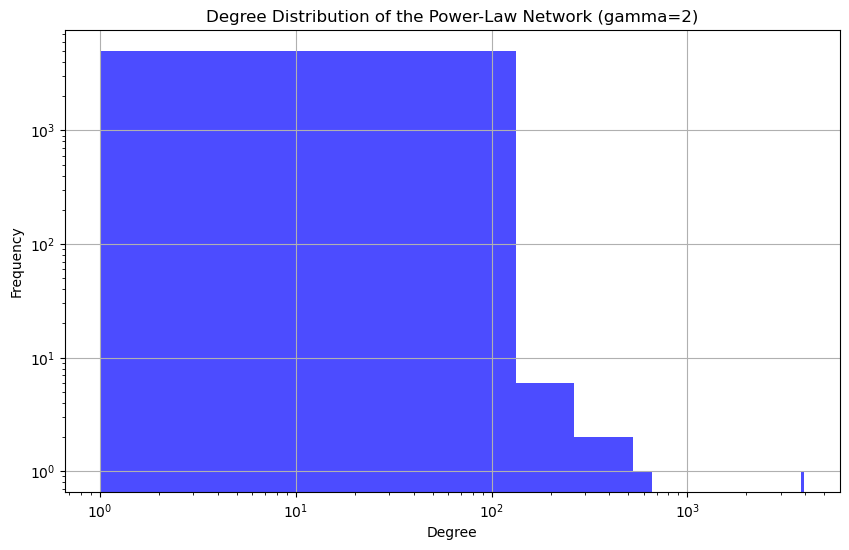

In [62]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

#generate a power-law degree sequence
def generate_powerlaw_degree_sequence(n, gamma, xmin):
    r = np.random.rand(n)
    degree_sequence = np.floor(xmin * (1 - r)**(-1 / (gamma - 1))).astype(int)

    #ensure the sum of the sequence is even
    if sum(degree_sequence) % 2 != 0:
        degree_sequence[random.randint(0, n-1)] += 1
    return degree_sequence

#create the network using the configuration model
def create_powerlaw_network(n, gamma=2, xmin=1):
    degree_sequence = generate_powerlaw_degree_sequence(n, gamma, xmin)
    G = nx.configuration_model(degree_sequence)
    G = nx.Graph(G)  # Remove multi-edges and self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

#check the friendship paradox in the new network
def friendship_paradox(G, iterations=1000):
    paradox_count = 0

    for _ in range(iterations):
        #randomly select a node
        node = random.choice(list(G.nodes))
        node_degree = G.degree(node)
        
        if node_degree == 0:  # If the node has no neighbors, skip
            continue

        #calculate the average degree of neighbors
        neighbor_degrees = [G.degree(neighbor) for neighbor in G.neighbors(node)]
        avg_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)

        #check if the friendship paradox holds for this node
        if avg_neighbor_degree > node_degree:
            paradox_count += 1

    return paradox_count

#run the simulation
n = 5000  # Number of nodes
gamma = 2  # Power law exponent
xmin = 1  # Minimum degree

#generate the network
F_BA_network = create_powerlaw_network(n, gamma, xmin)

#check for the friendship paradox in 1000 iterations
iterations = 1000
paradox_count = friendship_paradox(F_BA_network, iterations)

#step 5: Print the results
print(f"The friendship paradox holds {paradox_count} out of {iterations} times ({paradox_count / iterations:.2%}).")

#visualize the degree distribution
degree_sequence = [F_BA_network.degree(n) for n in F_BA_network.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=30, color='blue', alpha=0.7)
plt.title('Degree Distribution of the Power-Law Network (gamma=2)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()


### 1.3 THE FRIENDSHIP PARADOX AND THE CONFIGURATION MODEL ###

**Now generate a network for the configuration model that has the same slope and number of nodes as F-BA in A above; let's call this new network F-CM (for friendship configuration model)**

The friendship paradox holds 973 out of 1000 times in F-BA (97.30%).
The friendship paradox holds 951 out of 1000 times in F-CM (95.10%).


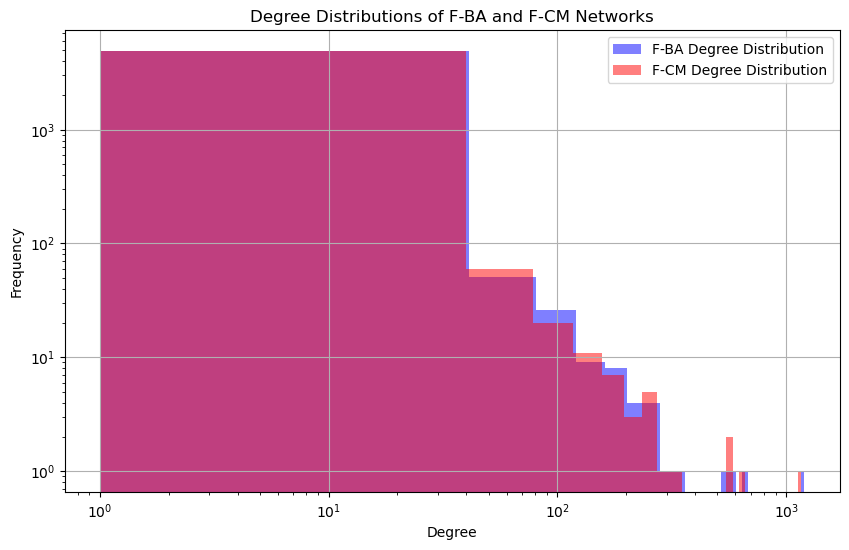

In [64]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

#function to generate a power-law degree sequence
def generate_powerlaw_degree_sequence(n, gamma, xmin):
    r = np.random.rand(n)
    degree_sequence = np.floor(xmin * (1 - r)**(-1 / (gamma - 1))).astype(int)

    #ensure the sum of the sequence is even
    if sum(degree_sequence) % 2 != 0:
        degree_sequence[random.randint(0, n-1)] += 1
    return degree_sequence

#create a power-law network (F-BA)
def create_powerlaw_network(n, gamma=2, xmin=1):
    degree_sequence = generate_powerlaw_degree_sequence(n, gamma, xmin)
    G = nx.configuration_model(degree_sequence)
    G = nx.Graph(G)  # Remove multi-edges and self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    return G, degree_sequence

#check the friendship paradox
def friendship_paradox(G, iterations=1000):
    paradox_count = 0

    for _ in range(iterations):
        node = random.choice(list(G.nodes))
        node_degree = G.degree(node)

        if node_degree == 0:  # If the node has no neighbors, skip
            continue

        neighbor_degrees = [G.degree(neighbor) for neighbor in G.neighbors(node)]
        avg_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)

        if avg_neighbor_degree > node_degree:
            paradox_count += 1

    return paradox_count

#generate F-BA network
n = 5000  # Number of nodes
gamma = 2  # Power law exponent
xmin = 1  # Minimum degree
F_BA_network, degree_sequence = create_powerlaw_network(n, gamma, xmin)

#generate F-CM network using the same degree sequence
F_CM_network = nx.configuration_model(degree_sequence)
F_CM_network = nx.Graph(F_CM_network)  # Remove multi-edges and self-loops
F_CM_network.remove_edges_from(nx.selfloop_edges(F_CM_network))

#check for the friendship paradox in both networks
iterations = 1000
paradox_count_BA = friendship_paradox(F_BA_network, iterations)
paradox_count_CM = friendship_paradox(F_CM_network, iterations)

#print the results
print(f"The friendship paradox holds {paradox_count_BA} out of {iterations} times in F-BA ({paradox_count_BA / iterations:.2%}).")
print(f"The friendship paradox holds {paradox_count_CM} out of {iterations} times in F-CM ({paradox_count_CM / iterations:.2%}).")

#visualize the degree distributions
plt.figure(figsize=(10, 6))

#F-BA
degree_sequence_BA = [F_BA_network.degree(n) for n in F_BA_network.nodes()]
plt.hist(degree_sequence_BA, bins=30, color='blue', alpha=0.5, label='F-BA Degree Distribution')

#F-CM
degree_sequence_CM = [F_CM_network.degree(n) for n in F_CM_network.nodes()]
plt.hist(degree_sequence_CM, bins=30, color='red', alpha=0.5, label='F-CM Degree Distribution')

plt.title('Degree Distributions of F-BA and F-CM Networks')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


**Assuming that F-BA and F-CM have the same degree sequence can now think about if F-BA and F-CM are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics**

**Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).** <br> Yes, factors such as assortativity, clustering, and community structure can significantly impact the frequency of the friendship paradox. In networks with high assortativity, nodes tend to connect with similar degree nodes, which may elevate the average degree of friends. Clustering creates tightly-knit communities that can also influence neighbor degree averages, thereby affecting the paradox's manifestation. These network properties can lead to variations in how often the paradox holds true, despite having similar degree distributions.

**How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)** <br> To rigorously test if the friendship paradox holds equally often in F-BA and F-CM, statistical tests like chi-squared tests can be employed to compare the proportions of instances where the paradox is true in both networks. Additionally, bootstrapping can be used to generate confidence intervals, allowing for the visualization of uncertainty in the results. This method helps assess the reliability of any observed differences and can provide error bars on plots for a clearer understanding of the variation in the paradox's frequency.







